In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
# Configuration of plot
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 7)

## 使用梯度下降优化任意一维函数

### 定义一个任意函数`arbitrary`与绘图函数

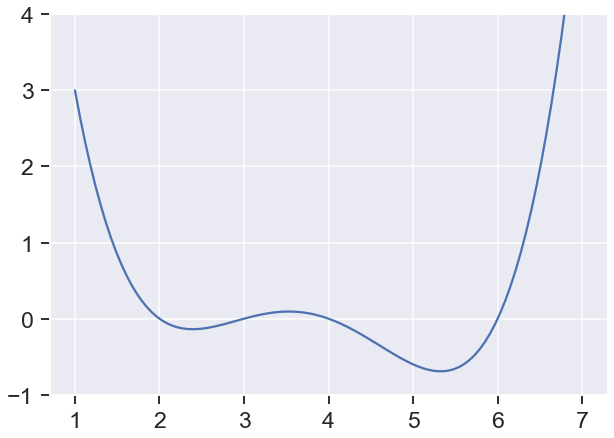

In [3]:
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144)/10

def plot_arbitrary():
    # 使用linspace函数在指定的间隔内返回均匀间隔的数字
    # 例：下面的语句返回1到7之间的100个数字
    x = np.linspace(1, 7, 100)
    plt.plot(x, arbitrary(x))
    axes = plt.gca()
    axes.set_ylim([-1, 4])

plot_arbitrary()

In [4]:
# 绘制一个函数func上的离散点
def plot_x_on_f(func, x):
    y = func(x)
    default_args = dict(label = r'$ \theta $', zorder = 2,
                       s = 100, c = sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)


# 绘制函数func上某点的切线
def plot_tangent_on_f(func, x, eps=1e-6):
    slope = (func(x+eps) - func(x-eps)) / (2*eps)
    xs = np.arange(x-1,x+1, 0.05)
    ys = func(x) + slope * (xs - x)
    plt.plot(xs, ys, zorder = 3, c=sns.xkcd_rgb['green'], linestyle='--')
    
# 绘制一组函数func上的离散点
def plot_xset_on_f(func, xset):
    yset = [func(x) for x in xset]
    default_args = dict(label = r'$ \theta $', zorder = 2,
                       s = 100, c = sns.xkcd_rgb['green'])
    plt.scatter(xset, yset, **default_args)
    

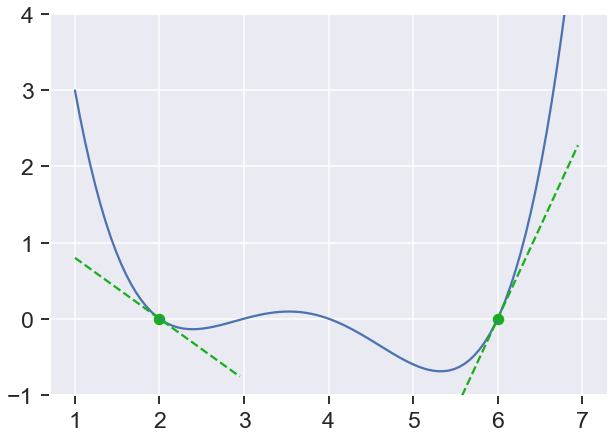

In [5]:
x = [2, 6]
plot_arbitrary()
plot_xset_on_f(arbitrary, x)
plot_tangent_on_f(arbitrary, 2)
plot_tangent_on_f(arbitrary, 6)

### 方法1：枚举一组`x`的取值，返回`arbitrary(x)`最小时`x`的取值

In [6]:
def simple_minimize(func, xset):
    y = [func(x) for x in xset]
    return xset[np.argmin(y)]

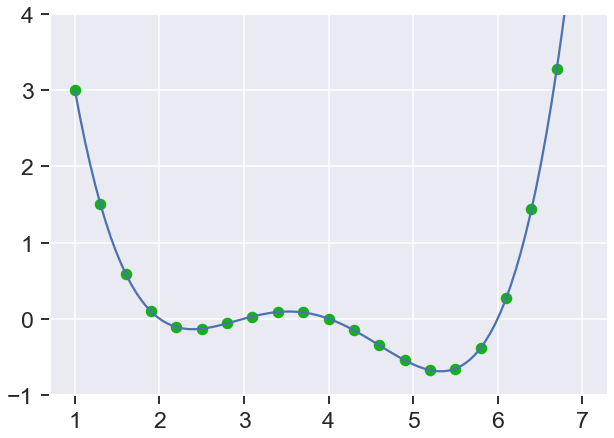

In [7]:
sparse_xset = np.linspace(1, 7, 21)
sparse_xset
plot_arbitrary()
plot_xset_on_f(arbitrary, sparse_xset)

In [8]:
simple_minimize(arbitrary, sparse_xset)

5.2

### 方法2：梯度下降Gradient Descent

In [9]:
def derivative_arbitrary(x):
    return (4*x**3 - 45*x**2 + 160*x - 180)/10

In [10]:
def gradient_descent(gradient, init_guess, learn_rate, n_iter):
    guess = init_guess
    for _ in range(n_iter):
        guess = guess - learn_rate * gradient(guess)
    return guess

def gradient_descent_with_plot(gradient, func, init_guess, learn_rate, n_iter):
    guess = init_guess
    plot_x_on_f(func, guess)
    guesses = [init_guess]
    for i in range(n_iter):
        print("{}-th iteration: guess = {}, gradient={}".format(i, np.round(guess, 2), np.round(gradient(guess), 2)))
        guess = guess - learn_rate * gradient(guess)
        guesses.append(guess)
        plot_x_on_f(func, guess)
        #plot_tangent_on_f(arbitrary, guess)
    guesses_func = [func(guess) for guess in guesses]
    plt.plot(np.array(guesses), guesses_func, 
            zorder = 3, c=sns.xkcd_rgb['green'], linestyle='-')
    return guess

0-th iteration: guess = 1, gradient=-6.1
1-th iteration: guess = 5.88, gradient=1.81
2-th iteration: guess = 4.43, gradient=-0.66
3-th iteration: guess = 4.95, gradient=-0.54
4-th iteration: guess = 5.39, gradient=0.14
5-th iteration: guess = 5.28, gradient=-0.1
6-th iteration: guess = 5.36, gradient=0.06
7-th iteration: guess = 5.3, gradient=-0.04
8-th iteration: guess = 5.34, gradient=0.03
9-th iteration: guess = 5.32, gradient=-0.02
10-th iteration: guess = 5.33, gradient=0.01
11-th iteration: guess = 5.32, gradient=-0.01
12-th iteration: guess = 5.33, gradient=0.01
13-th iteration: guess = 5.32, gradient=-0.0
14-th iteration: guess = 5.33, gradient=0.0
15-th iteration: guess = 5.33, gradient=-0.0
16-th iteration: guess = 5.33, gradient=0.0
17-th iteration: guess = 5.33, gradient=-0.0
18-th iteration: guess = 5.33, gradient=0.0
19-th iteration: guess = 5.33, gradient=-0.0
5.326499923466744


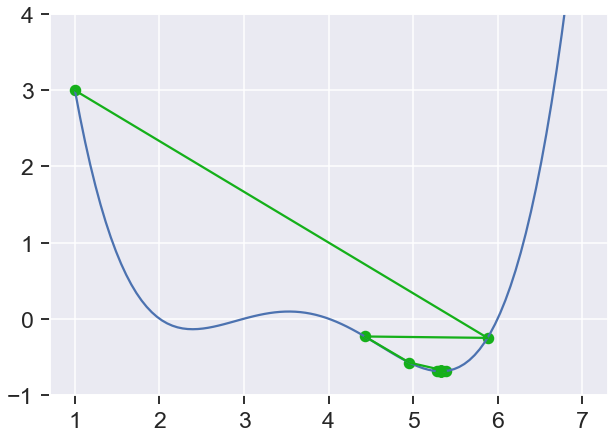

In [11]:
plot_arbitrary()
guess = gradient_descent_with_plot(derivative_arbitrary, arbitrary, 1, 0.8, 20)
print(guess)